## Load data

In [1]:
import pandas as pd
import ast
import numpy as np

# Load in data
admissions = 'tedsa_puf_2019.csv'
df = pd.read_csv(f'../../Downloads/{admissions}')

## Compare SUB1 groups with DSMCRIT

In [2]:
sub1 = df['SUB1']
for i in [1,2,3,4,8,9,10,11,12,13,14,15,16,17,18,19]:
    sub1 = sub1.replace(i, 'Other')
# sub1 = sub1.replace(-9, np.nan)

dsmcrit = df['DSMCRIT']
for i in [1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18,19]:
    dsmcrit = dsmcrit.replace(i, 'Other')
# dsmcrit = dsmcrit.replace(-9, np.nan)

In [3]:
df0 = pd.DataFrame()
df0['SUB1'] = sub1
df0['DSMCRIT'] = dsmcrit

df0.value_counts()

print('See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown')

See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown


## Filter out select rows and columns

In [4]:
df.columns

Index(['ADMYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT',
       'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG',
       'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [5]:
# Get count of original number of rows
old_rows = len(df)

# Drop Puerto Rico
# df = df[df['STFIPS'] != 72]

# Drop defined columns
columns_to_drop = ['ADMYR', 'CASEID', 'CBSA2010']  # consider also dropping 'STFIPS'
df = df.drop(columns=columns_to_drop)
print(f'Dropped {len(columns_to_drop)} columns ({len(df.columns)} remain)')

# Drop values where dependent variable is unknown
df = df[df['METHUSE'] != -9]

# Only keep patients admitted with self-described use of an opioid as their primary substance use (i.e., SUB1 = 5, 6, or 7)
df = df[df['SUB1'].between(5, 7)]
new_rows = len(df)
percent_change = round(100*(old_rows-new_rows)/old_rows, 1)
print(f'Dropped {"{:,}".format(old_rows-new_rows)} observations or {percent_change}% of the data ({"{:,}".format(new_rows)} rows remain)')

df = df.reset_index(drop='index')

Dropped 3 columns (59 remain)
Dropped 1,340,233 observations or 71.9% of the data (524,134 rows remain)


## Balance dataset

In [6]:
# Split into two dataframes, printing result
df_ones = df[df['METHUSE']==1]
df_twos = df[df['METHUSE']==2]
print(len(df_ones), len(df_twos))

# Sample down df_twos to the length of df_ones, printing result
ratio = len(df_ones)/len(df_twos)
df_twos = df_twos.sample(frac=ratio)
print(len(df_ones), len(df_twos))

# Recombine and shuffle for good measure :)
df = pd.concat([df_ones, df_twos], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

211743 312391
211743 211743


In [7]:
df

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,EMPLOY,METHUSE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,34,2,1,7,-9,5,1,0,4,1,...,0,0,0,0,0,0,2,1,1,2
1,26,4,2,4,-9,0,1,0,3,1,...,0,0,0,0,0,0,3,2,0,2
2,6,1,-9,8,-9,0,1,0,4,1,...,0,0,0,0,0,0,9,4,1,2
3,21,2,1,5,-9,5,1,0,3,2,...,0,0,0,0,0,1,6,3,1,2
4,26,3,1,7,-9,0,1,0,4,2,...,0,0,0,0,0,0,3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,6,2,-9,4,-9,0,6,0,4,2,...,0,0,0,0,0,0,9,4,0,3
423482,4,-9,-9,7,-9,2,1,0,4,2,...,0,0,0,0,0,0,8,4,1,2
423483,26,1,1,4,-9,5,1,0,4,1,...,0,0,0,0,0,0,3,2,0,2
423484,6,5,-9,5,-9,0,1,0,4,2,...,0,0,0,0,0,0,9,4,1,2


## Make dataset human-readable

In [8]:
# Load in variable dictionary
with open('VariableDictionary.txt') as file:
    variable_dict_string = file.read()
    variable_dict = ast.literal_eval(variable_dict_string)

# Rename entries in column according to dictionary
df2 = df.copy()
for col, col_dict in variable_dict.items():
    for old_value, new_value in variable_dict[col].items():
        df2[col] = df2[col].replace(old_value, new_value)

# Rename "-9" values as "Unknown"
for col in df2.columns:
    df2[col] = df2[col].replace(-9, 'Unknown')

In [9]:
# Merge DETNLF (detailed not in labor force) into EMPLOY==4 (not in labor force)
detailed_employ = []

for idx, value in df2.iterrows():
    if value['EMPLOY'] == 'NotInLaborForce':
        if value['DETNLF'] == 'Unknown':
            # Assign 'UnknownNotInLaborForce' if 'NotInLaborForce' and 'Unknown'
            detailed_employ.append('UnknownNotInLaborForce')
        else:
            # Otherwise, assign as the DETNLF value
            detailed_employ.append(value['DETNLF'])
    else:
        # Assign the EMPLOY value if not 'NotInLaborForce'
        detailed_employ.append(value['EMPLOY'])

# Add a new column for detailed employment and drop the two source columns
df2['DETEMPLOY'] = detailed_employ
df2 = df2.drop(columns=['EMPLOY', 'DETNLF'])

In [10]:
df2

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,NJ,Grade9To11,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,5PlusPriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,IDU,OtherDrugs,OtherNotInLaborForce
1,MI,1To3yCollege,NowMarried,RehabResShortTerm,Unknown,0PriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,EastNorthCentral,Midwest,NoIDU,OtherDrugs,Unemployed
2,CA,Grade8OrLess,Unknown,AmbulatoryDetox,Unknown,0PriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,UnknownNotInLaborForce
3,KY,Grade9To11,NeverMarried,RehabResLongTerm,Unknown,5PlusPriorTreatments,Individual,0Arrest,NoMethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,Reported,EastSouthCentral,South,IDU,OtherDrugs,Unemployed
4,MI,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,0PriorTreatments,Individual,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,EastNorthCentral,Midwest,IDU,Alcohol&Drugs,OtherNotInLaborForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,CA,Grade9To11,Unknown,RehabResShortTerm,Unknown,0PriorTreatments,OtherReferral,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,NoIDU,Alcohol&Drugs,UnknownNotInLaborForce
423482,AZ,Unknown,Unknown,AmbulatoryNonIntensiveOutpatient,Unknown,2PriorTreatments,Individual,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Mountain,West,IDU,OtherDrugs,OtherNotInLaborForce
423483,MI,Grade8OrLess,NeverMarried,RehabResShortTerm,Unknown,5PlusPriorTreatments,Individual,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,EastNorthCentral,Midwest,NoIDU,OtherDrugs,RetiredOrDisabled
423484,CA,4yCollegePlus,Unknown,RehabResLongTerm,Unknown,0PriorTreatments,Individual,0Arrest,NoMethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,UnknownNotInLaborForce


## Make machine-readable dataset (for exporting)

In [11]:
# Remove dependent variable
df2['METHUSE'] = df2['METHUSE'].replace('MethUse', 1)
df2['METHUSE'] = df2['METHUSE'].replace('NoMethUse', 0)

# df2.to_csv('human_readable_data.csv', index=False)

In [12]:
df3 = df2.copy()

# Convert categorical variables to dummy variables
df3 = pd.get_dummies(df3)

# Add intercept
df3.insert(0, 'Intercept', 1)

# Save dataframe to csv and show below
# df3.to_csv('data.csv', index=False)
df3

,Intercept,METHUSE,STFIPS_72,STFIPS_AK,STFIPS_AL,STFIPS_AR,STFIPS_AZ,STFIPS_CA,STFIPS_CO,STFIPS_CT,...,DETEMPLOY_FullTime,DETEMPLOY_Homemaker,DETEMPLOY_InstitutionResident,DETEMPLOY_OtherNotInLaborForce,DETEMPLOY_PartTime,DETEMPLOY_RetiredOrDisabled,DETEMPLOY_Student,DETEMPLOY_Unemployed,DETEMPLOY_Unknown,DETEMPLOY_UnknownNotInLaborForce
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
423482,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
423483,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
423484,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Make machine-readable dataset (encoding)

In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df4 = df2.copy()
df4 = df4.sample(frac=1)  # small size for testing code

In [14]:
from sklearn.preprocessing import OrdinalEncoder

df4['STFIPS'] = df4['STFIPS'].astype('category').cat.codes
df4['EDUC'] = OrdinalEncoder(categories=[['Unknown', 'Grade8OrLess', 'Grade9To11', 'Grade12OrGED', '1To3yCollege', '4yCollegePlus']]).fit_transform(df4[['EDUC']])
df4['MARSTAT'] = df4['MARSTAT'].astype('category').cat.codes
df4['SERVICES'] = df4['SERVICES'].astype('category').cat.codes
df4['DETCRIM'] = df4['DETCRIM'].astype('category').cat.codes
df4['NOPRIOR'] = OrdinalEncoder(categories=[['Unknown', '0PriorTreatments', '1PriorTreatments', '2PriorTreatments', '3PriorTreatments',
                                            '4PriorTreatments', '5PlusPriorTreatments']]).fit_transform(df4[['NOPRIOR']])
df4['PSOURCE'] = df4['PSOURCE'].astype('category').cat.codes
df4['ARRESTS'] = OrdinalEncoder(categories=[['Unknown', '0Arrest', '1Arrest', '2PlusArrest']]).fit_transform(df4[['ARRESTS']])
# df4['METHUSE'] = df4['METHUSE'].astype('category').cat.codes
df4['PSYPROB'] = df4['PSYPROB'].astype('category').cat.codes
df4['PREG'] = df4['PREG'].astype('category').cat.codes
df4['GENDER'] = df4['GENDER'].astype('category').cat.codes
df4['VET'] = df4['VET'].astype('category').cat.codes
df4['LIVARAG'] = df4['LIVARAG'].astype('category').cat.codes
df4['DAYWAIT'] = OrdinalEncoder(categories=[['Unknown', '0DaysWait', '1To7DaysWait', '8To14DaysWait', '15To30DaysWait',
                                            '31PlusDaysWait']]).fit_transform(df4[['DAYWAIT']])
df4['DSMCRIT'] = df4['DSMCRIT'].astype('category').cat.codes
df4['AGE'] = OrdinalEncoder(categories=[['Age12To14', 'Age15To17', 'Age18To20', 'Age21To24', 'Age25To29', 'Age30To34', 'Age35To39', 'Age40To44',
                                        'Age45To49', 'Age50To54', 'Age55To64', 'Age65Plus' ]]).fit_transform(df4[['AGE']])
df4['RACE'] = df4['RACE'].astype('category').cat.codes
df4['ETHNIC'] = df4['ETHNIC'].astype('category').cat.codes
df4['PRIMINC'] = df4['PRIMINC'].astype('category').cat.codes
df4['SUB1'] = df4['SUB1'].astype('category').cat.codes
df4['SUB2'] = df4['SUB2'].astype('category').cat.codes
df4['SUB3'] = df4['SUB3'].astype('category').cat.codes
df4['ROUTE1'] = df4['ROUTE1'].astype('category').cat.codes
df4['ROUTE2'] = df4['ROUTE2'].astype('category').cat.codes
df4['ROUTE3'] = df4['ROUTE3'].astype('category').cat.codes
df4['FREQ1'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ1']])
df4['FREQ2'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ2']])
df4['FREQ3'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ3']])
df4['FRSTUSE1'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE1']])
df4['FRSTUSE2'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE2']])
df4['FRSTUSE3'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE3']])
df4['HLTHINS'] = df4['HLTHINS'].astype('category').cat.codes
df4['PRIMPAY'] = df4['PRIMPAY'].astype('category').cat.codes
df4['FREQ_ATND_SELF_HELP'] = OrdinalEncoder(categories=[['Unknown', 'NoAttendance', 'SomeAttendance', '1To3TimesPastMonth', '4To7TimesPastMonth',
                                                        '8To30TimesPastMonth']]).fit_transform(df4[['FREQ_ATND_SELF_HELP']])
df4['ALCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['ALCFLG']])
df4['COKEFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['COKEFLG']])
df4['MARFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MARFLG']])
df4['HERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HERFLG']])
df4['METHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['METHFLG']])
df4['OPSYNFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OPSYNFLG']])
df4['PCPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['PCPFLG']])
df4['HALLFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HALLFLG']])
df4['MTHAMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MTHAMFLG']])
df4['AMPHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['AMPHFLG']])
df4['STIMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['STIMFLG']])
df4['BENZFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BENZFLG']])
df4['TRNQFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['TRNQFLG']])
df4['BARBFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BARBFLG']])
df4['SEDHPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['SEDHPFLG']])
df4['INHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['INHFLG']])
df4['OTCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTCFLG']])
df4['OTHERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTHERFLG']])
df4['DIVISION'] = df4['DIVISION'].astype('category').cat.codes
df4['REGION'] = df4['REGION'].astype('category').cat.codes
df4['IDU'] = OrdinalEncoder(categories=[['NoIDU', 'IDU']]).fit_transform(df4[['IDU']])
df4['ALCDRUG'] = OrdinalEncoder(categories=[['OtherDrugs', 'Alcohol&Drugs']]).fit_transform(df4[['ALCDRUG']])
df4['DETEMPLOY'] = df4['DETEMPLOY'].astype('category').cat.codes

In [15]:
df4.dtypes

STFIPS                    int8
EDUC                   float64
MARSTAT                   int8
SERVICES                  int8
DETCRIM                   int8
NOPRIOR                float64
PSOURCE                   int8
ARRESTS                float64
METHUSE                  int64
PSYPROB                   int8
PREG                      int8
GENDER                    int8
VET                       int8
LIVARAG                   int8
DAYWAIT                float64
DSMCRIT                   int8
AGE                    float64
RACE                      int8
ETHNIC                    int8
PRIMINC                   int8
SUB1                      int8
SUB2                      int8
SUB3                      int8
ROUTE1                    int8
ROUTE2                    int8
ROUTE3                    int8
FREQ1                  float64
FREQ2                  float64
FREQ3                  float64
FRSTUSE1               float64
FRSTUSE2               float64
FRSTUSE3               float64
HLTHINS 

In [16]:
df4

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
209372,8,2.0,1,1,8,6.0,5,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,7,2,0.0,0.0,5
138361,20,3.0,1,2,8,2.0,3,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,7,2,1.0,1.0,7
255711,19,3.0,1,6,8,6.0,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,5,1,1.0,0.0,3
328399,34,2.0,4,4,8,0.0,3,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,3,1,0.0,0.0,3
241035,2,2.0,1,2,8,2.0,3,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53814,37,3.0,1,5,8,6.0,1,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,3,1,1.0,0.0,7
44870,44,4.0,4,2,8,2.0,3,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,7,2,0.0,0.0,0
407737,43,4.0,1,1,8,4.0,3,2.0,1,1,...,0.0,0.0,0.0,0.0,0.0,4,4,1.0,0.0,7
212495,38,3.0,1,2,8,1.0,3,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,5,1,0.0,1.0,5


### Train test split

## Train XG Boost model

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = df4.drop('METHUSE', axis=1)
y = df4['METHUSE'].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Search the parameter grid
# Docs: https://xgboost.readthedocs.io/en/latest/parameter.html
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#2.-XGBoost-hyperparameters-
space={'colsample_bytree': hp.quniform('colsample_bytree', 0.1, 1, 0.01),
       'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
       'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
       'learning_rate': hp.quniform('learning_rate', 0.01, 0.5, 0.01),
       'max_depth': hp.quniform("max_depth", 3, 27, 1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': hp.choice('n_estimators', range(100, 1000)),
       'reg_alpha' : hp.quniform('reg_alpha', 40, 180, 1),
       'reg_lambda' : hp.uniform('reg_lambda', 0, 1),
       'subsample': hp.quniform('subsample', 0.5, 1, 0.05)
    }

def objective(space):
    clf=xgb.XGBClassifier(colsample_bytree=round(space['colsample_bytree'], 0),
                          early_stopping_rounds=10,
                          eta=space['eta'],
                          eval_metric='auc',
                          gamma=space['gamma'],
                          learning_rate=space['learning_rate'],
                          max_depth=int(round(space['max_depth'], 0)),
                          min_child_weight=space['min_child_weight'],
                          n_estimators=space['n_estimators'],
                          objective='binary:logistic',
                          reg_alpha=space['reg_alpha'],
                          reg_lambda=space['reg_lambda'],
                          seed=24,
                          subsample=round(space['subsample'], 0))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train, eval_set=evaluation, verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", round(accuracy, 3))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [19]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.732                                                  
SCORE:                                                                            
0.752                                                                             
SCORE:                                                                            
0.798                                                                             
SCORE:                                                                            
0.847                                                                            
SCORE:                                                                               
0.751                                                                                
SCORE:                                                                               
0.755                                                                                
SCORE:                                         

In [71]:
"""
# Best from 100 runs (50 would have done just fine)

{'colsample_bytree': 0.55,
 'eta': 0.15000000000000002,
 'gamma': 0.8,
 'learning_rate': 0.27,
 'max_depth': 20.0,
 'min_child_weight': 3.0,
 'n_estimators': 598,
 'reg_alpha': 40.0,
 'reg_lambda': 0.38166847419409755,
 'subsample': 0.6000000000000001}
"""

best_hyperparams

{'colsample_bytree': 0.55,
 'eta': 0.15000000000000002,
 'gamma': 0.8,
 'learning_rate': 0.27,
 'max_depth': 20.0,
 'min_child_weight': 3.0,
 'n_estimators': 598,
 'reg_alpha': 40.0,
 'reg_lambda': 0.38166847419409755,
 'subsample': 0.6000000000000001}

In [68]:
best_hyperparams

{'colsample_bytree': 0.32,
 'eta': 0.15000000000000002,
 'gamma': 0.55,
 'learning_rate': 0.46,
 'max_depth': 26.0,
 'min_child_weight': 2.0,
 'n_estimators': 145,
 'reg_alpha': 52.0,
 'reg_lambda': 0.6970257996802689,
 'subsample': 0.55}

In [64]:
best_hyperparams

{'colsample_bytree': 0.41000000000000003,
 'eta': 0.375,
 'gamma': 0.7000000000000001,
 'learning_rate': 0.21,
 'max_depth': 18.0,
 'min_child_weight': 7.0,
 'n_estimators': 712,
 'reg_alpha': 52.0,
 'reg_lambda': 0.48249702085543966,
 'subsample': 0.55}

In [47]:
best_hyperparams

{'colsample_bytree': 0.6540100920285379,
 'gamma': 3.9462282052747866,
 'max_depth': 15.0,
 'min_child_weight': 7.0,
 'reg_alpha': 44.0,
 'reg_lambda': 0.6003673027519678}

In [44]:
best_hyperparams

{'colsample_bytree': 0.8479086592427905,
 'gamma': 4.093522350095821,
 'max_depth': 16.0,
 'min_child_weight': 5.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.3787091501538802}

In [33]:
best_hyperparams

{'colsample_bytree': 0.6139927074990315,
 'gamma': 5.215043577961982,
 'max_depth': 9.0,
 'min_child_weight': 10.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.9959998933338382}

In [31]:
best_hyperparams

{'colsample_bytree': 0.8337595545273556,
 'gamma': 2.0044811704634977,
 'max_depth': 6.0,
 'min_child_weight': 3.0,
 'reg_alpha': 66.0,
 'reg_lambda': 0.9642340057671982}

In [21]:
# import xgboost as xgb
# import shap
# import numpy as np
#
# # Train XGBoost model
# model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=24)
# model.fit(X_train, y_train)

In [22]:
stop

NameError: name 'stop' is not defined

### Interpretability

In [21]:
import shap

best_hyperparams_formatted = best_hyperparams.copy()
best_hyperparams_formatted['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams_formatted['eval_metric'] = 'auc'
best_hyperparams_formatted['objective'] = 'binary:logistic'
best_hyperparams_formatted['seed'] = 24


best_model = xgb.XGBClassifier(**best_hyperparams_formatted)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.55,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.15000000000000002, eval_metric='auc', gamma=0.8, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.27, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=598, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=24, reg_alpha=40.0, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


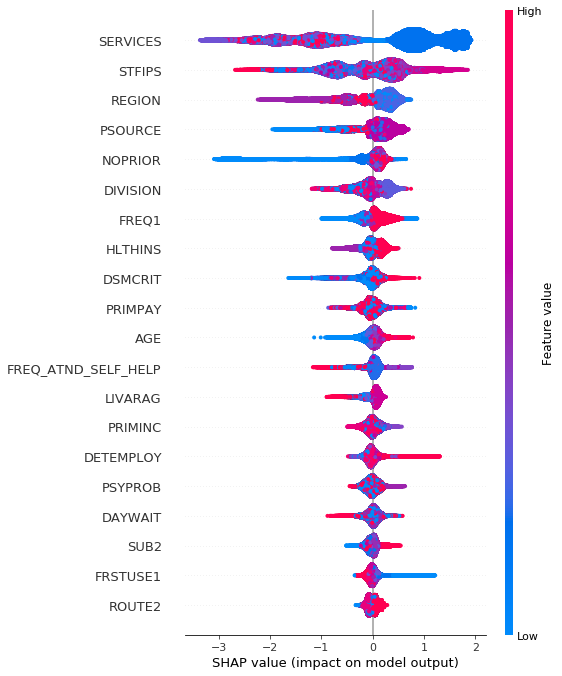

In [22]:
# Generate Shapley values
explainer = shap.Explainer(best_model)
shap_values = explainer(X) # test if I should use X or X_test

# Plot Shapley summary plot
shap.summary_plot(shap_values, X)

In [24]:
shap.initjs()

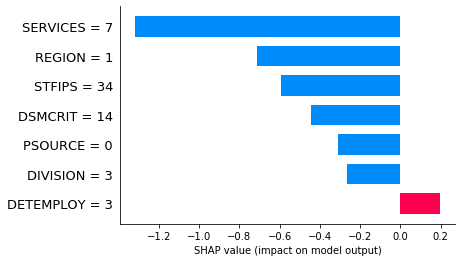

In [33]:
shap.bar_plot(shap_values=shap_values[0].values, features=X_test.iloc[0,:])

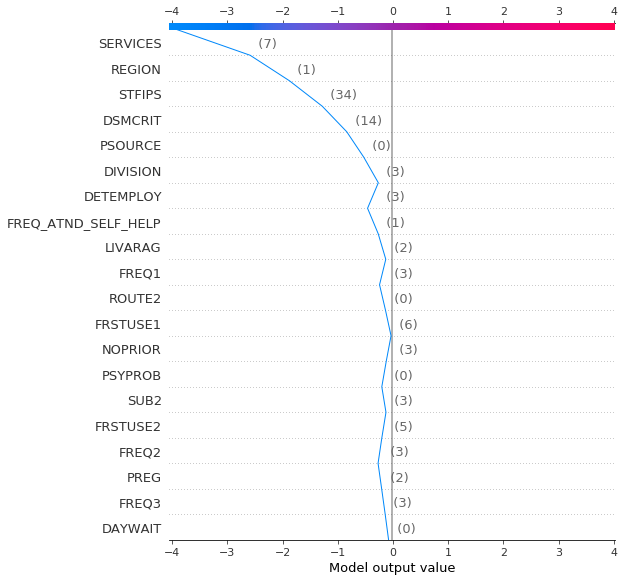

In [41]:
# Decision plot for single sample
shap.decision_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0,:])

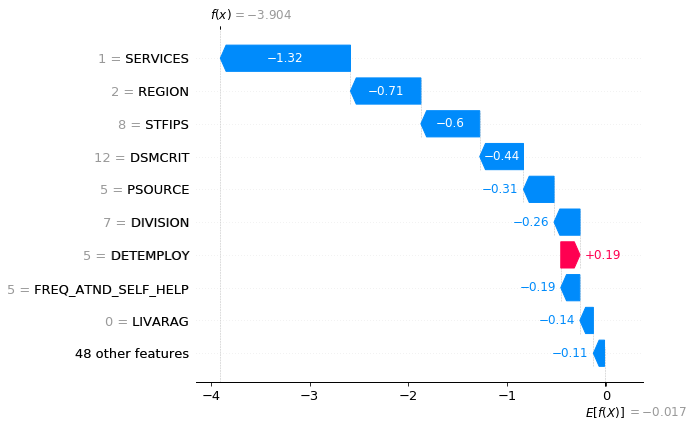

In [45]:
# shap_values[0].values
shap.waterfall_plot(shap_values[0])

In [53]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0,:])

In [59]:
def absolute_share(input_list):
    absolute_list = [abs(i) for i in input_list]
    absolute_share_list = [j/sum(absolute_list) for j in absolute_list]
    return absolute_share_list

# Show table of top Shapley values
feature_names = X.columns
result = pd.DataFrame(shap_values.values, columns=feature_names)
values = np.abs(result.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, values)), columns=['feature_name','feature_importance'])
shap_importance.sort_values(by=['feature_importance'], ascending=False, inplace=True)
shap_importance.head(10)

,feature_name,feature_importance
3,SERVICES,1.213002
0,STFIPS,0.538046
53,REGION,0.436002
6,PSOURCE,0.304619
5,NOPRIOR,0.269368
52,DIVISION,0.237621
25,FREQ1,0.173633
31,HLTHINS,0.139118
14,DSMCRIT,0.136947
32,PRIMPAY,0.121633


In [61]:
# Show table of top Shapley values
feature_names = X.columns
result = pd.DataFrame(shap_values.values, columns=feature_names)
values = np.abs(result.values).mean(0)
abs_values = absolute_share(np.abs(result.values).mean(0))
shap_importance = pd.DataFrame(list(zip(feature_names, values, abs_values)), columns=['feature_name','feature_importance', 'abs_feature_importance'])
shap_importance.sort_values(by=['feature_importance'], ascending=False, inplace=True)
shap_importance.head(25)

,feature_name,feature_importance,abs_feature_importance
3,SERVICES,1.213002,0.216342
0,STFIPS,0.538046,0.095962
53,REGION,0.436002,0.077762
6,PSOURCE,0.304619,0.054330
5,NOPRIOR,0.269368,0.048043
52,DIVISION,0.237621,0.042380
25,FREQ1,0.173633,0.030968
31,HLTHINS,0.139118,0.024812
14,DSMCRIT,0.136947,0.024425
32,PRIMPAY,0.121633,0.021694


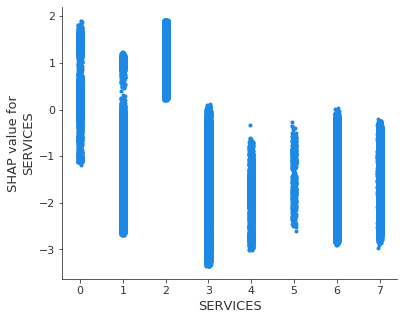

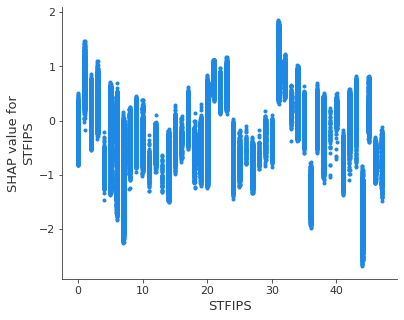

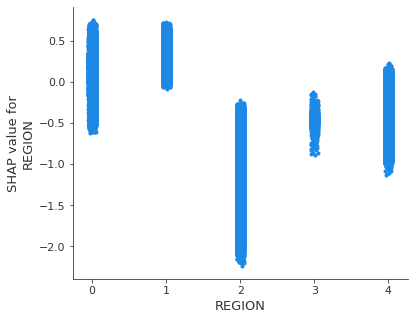

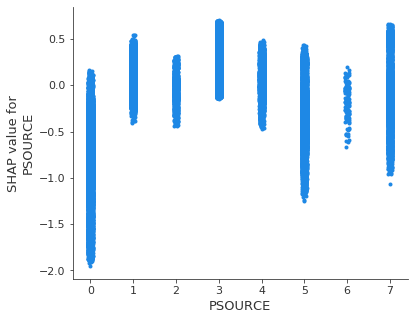

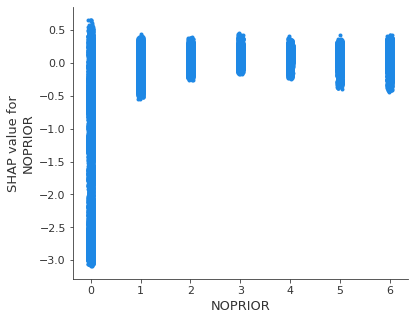

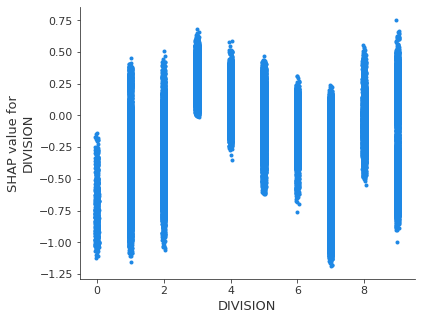

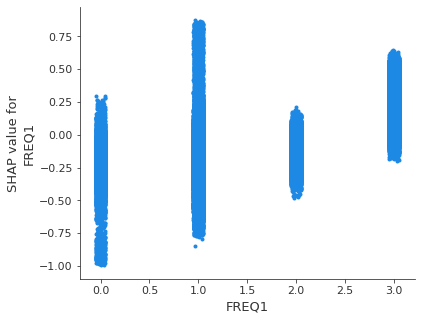

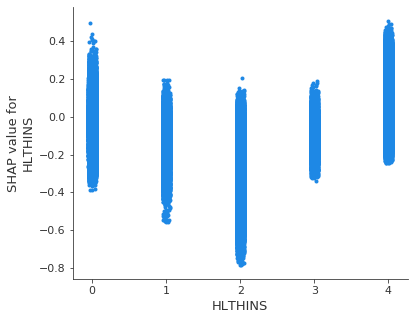

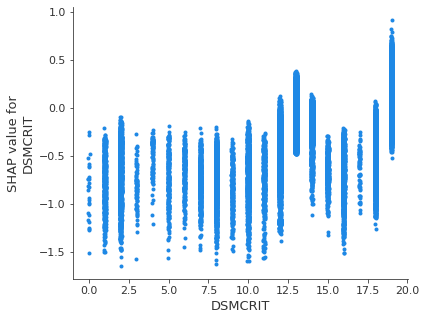

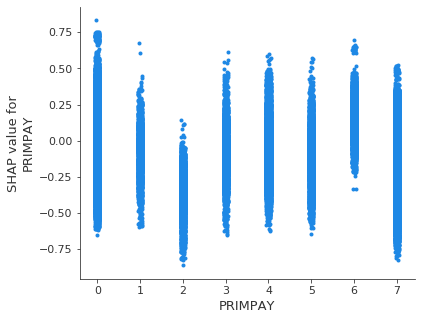

In [70]:
# Show dependence plots for the top n features across all observations
# NOTE: In order to get dependence plot to work, you must revert to matplotlib==3.1.3
# Examples of dependence plots: https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html
top_features = shap_importance['feature_name'][0:10]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X, x_jitter=0.1, interaction_index=None)

In [67]:
shap_values.values

array([[-5.9545624e-01,  4.6351861e-02, -4.4180136e-04, ...,
        -3.2184865e-02, -3.3314463e-03,  1.9490497e-01],
       [ 4.0379222e-02, -3.7105674e-06,  2.7467409e-02, ...,
         1.4103866e-02, -8.6305961e-02, -1.6596241e-02],
       [-2.5894812e-01,  2.3077499e-02,  5.7218634e-02, ...,
         4.0800866e-02,  2.2075628e-03, -1.5164678e-02],
       ...,
       [ 4.4013971e-01, -1.0315959e-01,  5.8432501e-03, ...,
         5.7721723e-02, -3.9053638e-03,  1.0109301e-02],
       [-2.4727175e-01,  2.4914017e-02,  3.9574202e-02, ...,
        -3.4210339e-02, -3.3268146e-02,  8.4967919e-02],
       [ 6.1591375e-01, -6.3464716e-02, -1.1546882e-02, ...,
         3.5862844e-02, -1.9864423e-02,  4.0869202e-02]], dtype=float32)